## Rodent data exploration
### By Richard Diamond

In this notebook, I will be using various methods to analyze and visualize data related to rodent populations across various US counties.

## 1. Loading in data
I loaded in data from various different sources to try and predict rodent count by county.

In [174]:
#import packages
import numpy as np
import pandas as pd

First, we load in the data representing the rodent estimates by county.

In [175]:
#load in rodent data
rodents = pd.read_csv('rodent19.csv').dropna()

#remove non-numeric characters from numeric columns
rodents['Rodent Estimate'] = rodents['Rodent Estimate'].str.replace(',', '').astype(int)
rodents['90% CI Lower Bound'] = rodents['90% CI Lower Bound'].str.replace(',', '').astype(int)
rodents['90% CI Upper Bound'] = rodents['90% CI Upper Bound'].str.replace(',', '').astype(int)
rodents['Housing Unit Estimate'] = rodents['Housing Unit Estimate'].str.replace(',', '').astype(int)

rodents.head()

,State Fips Code,County Fips Code,Name,Housing Unit Estimate,Rodent Estimate,90% CI Lower Bound,90% CI Upper Bound
0,01,1.0,"Autauga County, AL",23896,2331,1069,3593
1,01,3.0,"Baldwin County, AL",119412,8328,3640,13016
2,01,5.0,"Barbour County, AL",12080,1783,812,2754
3,01,7.0,"Bibb County, AL",9261,1679,734,2624
4,01,9.0,"Blount County, AL",24517,4615,2017,7214


Next, we load in the temperature data.

In [176]:
temperature = pd.read_csv('./temperature.csv')

#drop unnamed columns
temperature.drop(columns=['Unnamed: 7', 'Unnamed: 8'], inplace=True)

temperature.head()

,ID,Name,State,temperature,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,AL-001,Autauga County,Alabama,65,1.4,96.0,63.6
1,AL-003,Baldwin County,Alabama,67.7,1.3,96.0,66.4
2,AL-005,Barbour County,Alabama,65,0.5,76.0,64.5
3,AL-007,Bibb County,Alabama,63.7,1.2,93.0,62.5
4,AL-009,Blount County,Alabama,62.7,2.4,103.0,60.3


We now need to change the 'Name' values to be in the same format as they are in the above dataframe. This will help facilitate a merging of the two.

In [177]:
#define function to create name column
def create_name(row):
    # Grab ID value
    id_value = str(row['ID'])
    
    # Grab abbreviation from ID
    state_abb = id_value[:2]
    
    #concatenate abbreviation with county name
    name = str(row['Name']) + ', ' + state_abb
    
    return name

# Apply the function
temperature['New_Name'] = temperature.apply(create_name, axis=1)
    
    

We now drop unnecessary columns from our temperature data so as not to make out new dataframe cluttered.

In [178]:
temperature = temperature.drop(columns = ['Anomaly (1901-2000 base period)', 'State', 'Rank', 'Name', 'ID'])

Now, we can proceed and merge our data.

In [179]:
rodent_data = pd.merge(rodents, temperature, left_on = 'Name', right_on = 'New_Name', how = 'left').drop(columns = 'New_Name')

rodent_data

,State Fips Code,County Fips Code,Name,Housing Unit Estimate,Rodent Estimate,90% CI Lower Bound,90% CI Upper Bound,temperature,1901-2000 Mean
0,01,1.0,"Autauga County, AL",23896,2331,1069,3593,65,63.6
1,01,3.0,"Baldwin County, AL",119412,8328,3640,13016,67.7,66.4
2,01,5.0,"Barbour County, AL",12080,1783,812,2754,65,64.5
3,01,7.0,"Bibb County, AL",9261,1679,734,2624,63.7,62.5
4,01,9.0,"Blount County, AL",24517,4615,2017,7214,62.7,60.3
...,...,...,...,...,...,...,...,...,...
3137,56,37.0,"Sweetwater County, WY",19909,2869,1254,4485,42.5,39.1
3138,56,39.0,"Teton County, WY",14186,2200,962,3439,34.7,32.4
3139,56,41.0,"Uinta County, WY",9108,1747,764,2731,39.9,37.3
3140,56,43.0,"Washakie County, WY",3868,861,376,1346,45,42.7


Next, we add in population density data.

In [180]:
pop_density = pd.read_csv('./density.csv')

pop_density.head()

,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,GCT_STUB.target-geo-id2,GCT_STUB.display-label,Density per square mile of land area
0,0400000US01,1,Alabama,0500000US01001,1001,Autauga County,91.8
1,0400000US01,1,Alabama,0500000US01003,1003,Baldwin County,114.6
2,0400000US01,1,Alabama,0500000US01005,1005,Barbour County,31.0
3,0400000US01,1,Alabama,0500000US01007,1007,Bibb County,36.8
4,0400000US01,1,Alabama,0500000US01009,1009,Blount County,88.9


We now need to load in state abbreviation data in order to facilitate the merging to the original rodent data.

In [181]:
states = pd.read_csv('./states.csv')

#merge state abbreviations in
merged_pop_density = merged_pop_density = pd.merge(pop_density, states, left_on='GEO.display-label', right_on='State', how='left')

#drop unnecessary column
merged_pop_density = merged_pop_density.drop(columns = ['GEO.display-label'])

In [182]:
#create complete county name column
def create_county_name(row):
    
    name = str(row['GCT_STUB.display-label'])
    
    abb = str(row['Abbreviation'])
    
    return name + ', ' + abb
#apply function to dataframe
merged_pop_density['county'] = merged_pop_density.apply(create_county_name, axis = 1)

In [183]:
#shorten to essential columns and merge to original
shortened_density = merged_pop_density[['county', 'Density per square mile of land area']]

rodent_data = pd.merge(rodent_data, shortened_density, left_on = 'Name', right_on = 'county', how = 'left').drop(columns = ['county'])

In [184]:
rodent_data

,State Fips Code,County Fips Code,Name,Housing Unit Estimate,Rodent Estimate,90% CI Lower Bound,90% CI Upper Bound,temperature,1901-2000 Mean,Density per square mile of land area
0,01,1.0,"Autauga County, AL",23896,2331,1069,3593,65,63.6,91.8
1,01,3.0,"Baldwin County, AL",119412,8328,3640,13016,67.7,66.4,114.6
2,01,5.0,"Barbour County, AL",12080,1783,812,2754,65,64.5,31.0
3,01,7.0,"Bibb County, AL",9261,1679,734,2624,63.7,62.5,36.8
4,01,9.0,"Blount County, AL",24517,4615,2017,7214,62.7,60.3,88.9
...,...,...,...,...,...,...,...,...,...,...
3137,56,37.0,"Sweetwater County, WY",19909,2869,1254,4485,42.5,39.1,4.2
3138,56,39.0,"Teton County, WY",14186,2200,962,3439,34.7,32.4,5.3
3139,56,41.0,"Uinta County, WY",9108,1747,764,2731,39.9,37.3,10.1
3140,56,43.0,"Washakie County, WY",3868,861,376,1346,45,42.7,3.8


Lastly, we need to load in poverty estimates.

In [185]:
poverty = pd.read_csv('./Poverty.csv')

Similarly as above, we need to write a function to get the county name to faciliate out merge.

In [186]:
def get_county_name(row):
    
    #get abbreviation
    abbr = str(row['Stabr'])
    
    #get county name
    county_name = str(row['Area_name'])
    
    return county_name + ', ' + abbr

In [187]:
#apply function to dataframe
poverty['county_name'] = poverty.apply(get_county_name, axis = 1)

#shorten dataframe to essential columns
poverty_short = poverty[['county_name', 'PCTPOVALL_2021', 'MEDHHINC_2021']]

Now, we finally merge the poverty data into out main dataframe.

In [188]:
rodent_data = pd.merge(
    rodent_data,
    poverty_short,
    left_on='Name',
    right_on='county_name',
    how='left'
).drop(columns = ['Name'])

In [189]:
#show resulting data
rodent_data

,State Fips Code,County Fips Code,Housing Unit Estimate,Rodent Estimate,90% CI Lower Bound,90% CI Upper Bound,temperature,1901-2000 Mean,Density per square mile of land area,county_name,PCTPOVALL_2021,MEDHHINC_2021
0,01,1.0,23896,2331,1069,3593,65,63.6,91.8,"Autauga County, AL",10.7,66444.0
1,01,3.0,119412,8328,3640,13016,67.7,66.4,114.6,"Baldwin County, AL",10.8,65658.0
2,01,5.0,12080,1783,812,2754,65,64.5,31.0,"Barbour County, AL",23.0,38649.0
3,01,7.0,9261,1679,734,2624,63.7,62.5,36.8,"Bibb County, AL",20.6,48454.0
4,01,9.0,24517,4615,2017,7214,62.7,60.3,88.9,"Blount County, AL",12.0,56894.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56,37.0,19909,2869,1254,4485,42.5,39.1,4.2,"Sweetwater County, WY",9.2,74677.0
3139,56,39.0,14186,2200,962,3439,34.7,32.4,5.3,"Teton County, WY",5.9,102709.0
3140,56,41.0,9108,1747,764,2731,39.9,37.3,10.1,"Uinta County, WY",9.4,70162.0
3141,56,43.0,3868,861,376,1346,45,42.7,3.8,"Washakie County, WY",10.2,62176.0


## 2. Initial data exploration
First, I wanted to briefly explore the dataset. The first step to this was understanding what counties have the most rodents per housing unit.

In [190]:
#create new rodents per unit column
rodent_data['rodents_per_unit'] = rodent_data['Rodent Estimate'] / rodent_data['Housing Unit Estimate']

#sort values to see what counties are best and worst at rodent prevention
rodent_data.sort_values(by = 'rodents_per_unit', ascending = False)

,State Fips Code,County Fips Code,Housing Unit Estimate,Rodent Estimate,90% CI Lower Bound,90% CI Upper Bound,temperature,1901-2000 Mean,Density per square mile of land area,county_name,PCTPOVALL_2021,MEDHHINC_2021,rodents_per_unit
2674,48,301.0,55,34,15,53,67.2,64.2,0.1,"Loving County, TX",5.3,100917.0,0.618182
1377,27,125.0,1948,1189,520,1859,44.5,40.5,9.5,"Red Lake County, MN",9.1,57208.0,0.610370
2034,38,87.0,456,268,117,419,44.8,42.1,0.6,"Slope County, ND",12.8,57922.0,0.587719
2392,46,61.0,1219,709,310,1109,48.7,46.8,7.7,"Hanson County, SD",8.2,79602.0,0.581624
1368,27,107.0,3445,1908,834,2982,46.8,41.6,7.9,"Norman County, MN",11.9,60560.0,0.553846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,12,15.0,107124,3247,1419,5075,73.3,71.9,235.2,"Charlotte County, FL",10.9,59547.0,0.030311
355,12,71.0,408561,10757,5075,16438,73.9,72.4,788.7,"Lee County, FL",12.2,66426.0,0.026329
1755,32,15.0,2741,62,27,96,45.1,43.8,1.1,"Lander County, NV",11.0,85773.0,0.022619
370,12,99.0,693140,14325,8117,20533,74.1,72.2,670.2,"Palm Beach County, FL",11.6,70024.0,0.020667


There are some counties with a very small number of housing units that have the worst rodents per unit score, which makes sense as data in those counties may be less reliable. Next, I wanted to look at bigger counties and see which ones were best and worst at rodent prevention. 

In [191]:
#filter out counties with less than 100,000 households
big_counties = rodent_data[rodent_data['Housing Unit Estimate']>= 100000]

#sort values to see what counties are best and worst at rodent prevention
big_counties.sort_values(by = 'rodents_per_unit', ascending = False)

,State Fips Code,County Fips Code,Housing Unit Estimate,Rodent Estimate,90% CI Lower Bound,90% CI Upper Bound,temperature,1901-2000 Mean,Density per square mile of land area,county_name,PCTPOVALL_2021,MEDHHINC_2021,rodents_per_unit
2295,42,101.0,691633,204708,179990,229426,55.3,51.2,11379.5,"Philadelphia County, PA",22.3,52882.0,0.295978
1383,27,137.0,105306,24726,10807,38644,40.3,37.6,32.0,"St. Louis County, MN",13.8,64321.0,0.234801
2120,39,153.0,246432,53757,35332,72182,53.5,47.1,1312.6,"Summit County, OH",12.5,63191.0,0.218141
1861,36,65.0,105614,22323,10108,34539,44.9,42.5,193.7,"Oneida County, NY",14.2,59804.0,0.211364
1772,33,15.0,134190,27527,21546,33509,46.8,44.1,425.0,"Rockingham County, NH",4.6,104281.0,0.205135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,04,13.0,1789190,55325,44939,65711,67.8,66.3,414.9,"Maricopa County, AZ",11.3,76230.0,0.030922
328,12,15.0,107124,3247,1419,5075,73.3,71.9,235.2,"Charlotte County, FL",10.9,59547.0,0.030311
355,12,71.0,408561,10757,5075,16438,73.9,72.4,788.7,"Lee County, FL",12.2,66426.0,0.026329
370,12,99.0,693140,14325,8117,20533,74.1,72.2,670.2,"Palm Beach County, FL",11.6,70024.0,0.020667


## 3. Trying to understand what causes rodents - RandomForest
Next, I wanted to try and predict rodent count using the various factors we imported. The first model I wanted to try was RandomForest. This model, adapted for a regression like this one, randomly samples a number of data points and creates a decision tree to determine what we predict as our final rodents per unit. These trees are averaged to come up with a final prediction for our rodents per unit.

In [192]:
#drop NA values to facilitate machine learning processes
rodent_data = rodent_data.dropna()

In [193]:
#identify features and target variable
features = ['temperature', 'Density per square mile of land area',
           'PCTPOVALL_2021', 'MEDHHINC_2021']
target = ['rodents_per_unit']

X = rodent_data[features]
y = rodent_data[target]

We now split the data into training and testing.

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
#split data using 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we will perform a hyperparameter grid search to find the best RandomForest model. This ensures that we pick a model with hyperparameters that make sense for our problem.

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [197]:
#initialize model
rf = RandomForestRegressor(random_state=42)

#define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [None, 10, 20],    
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2]    
}

In [198]:
#perform our grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [199]:
#fit the model
grid_search.fit(X_train, np.ravel(y_train))

#get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

#save best model
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [200]:
from sklearn.metrics import mean_squared_error, r2_score

Finally, we create our random forest model to try and predict rodent count.

In [201]:
#train the model
best_rf.fit(X_train, np.ravel(y_train))

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [202]:
#make predictions on the test set
y_pred = best_rf.predict(X_test)

In [203]:
#calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0047565772785926
R-squared: 0.5379215992234838


As we can see, our MSE is about 0.004. This means on average, our prediction is 0.004 rodents per unit off. Our R-Squared is around 0.54, which means we can explain 0.54 of the variance in rodents per unit using our features.

## 4. Switching models: Ridge regression
I wanted to try ridge regression to see how that method fared.

In [204]:
from sklearn.linear_model import Ridge

In [205]:
#instantiate ridge model
ridge = Ridge(alpha=1.0)

#fit ridge model on train data
ridge.fit(X_train, np.ravel(y_train))

#make predictions on test set
y_pred_ridge = ridge.predict(X_test)

In [206]:
#find MSE and R2
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse_ridge}")


r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R-squared: {r2_ridge}")

Mean Squared Error: 0.00744407602113401
R-squared: 0.2768441377825812


The ridge model performs significantly worse than the random forest model.

## 5. Trying GradientBoosting
Lastly, I wanted to try GradientBoosting. This uses a lot of the same logic as RandomForest, but instead tries to fix mistakes made my the pervious decision trees in each subsequent tree.

In [207]:
from sklearn.ensemble import GradientBoostingRegressor

Again, we use a hyperparameter grid search to find the best values for our model

In [208]:
# Define the gradient boosting regressor
gb_reg = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [2, 4, 6],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
}

#set up grid search
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

#fit the grid search to the data
grid_search.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [209]:
#save best model generates by our grid search
gb_model = grid_search.best_estimator_

In [210]:
#fit and predict using best model
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

/Users/richarddiamond/miniconda3/envs/rodents/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [211]:
#calculate MSE and R2

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse_gb}")

r2_gb = r2_score(y_test, y_pred_gb)
print(f"R-squared: {r2_gb}")

Mean Squared Error: 0.005087505537962291
R-squared: 0.5057735246931888


## 6. Analysis

Overall, the best model in terms of making predictions on unseen data is the RandomForest model. Our R-squared value was around 0.54, which means our model was able to explain 54% of the variance in rodent sightings. This outperforms GradientBoosting by a little, and blows ridge regression out of the water. I wanted to bring out feature importances of the RandomForest model to best determine what drives rodent sightings.

In [212]:
import matplotlib.pyplot as plt

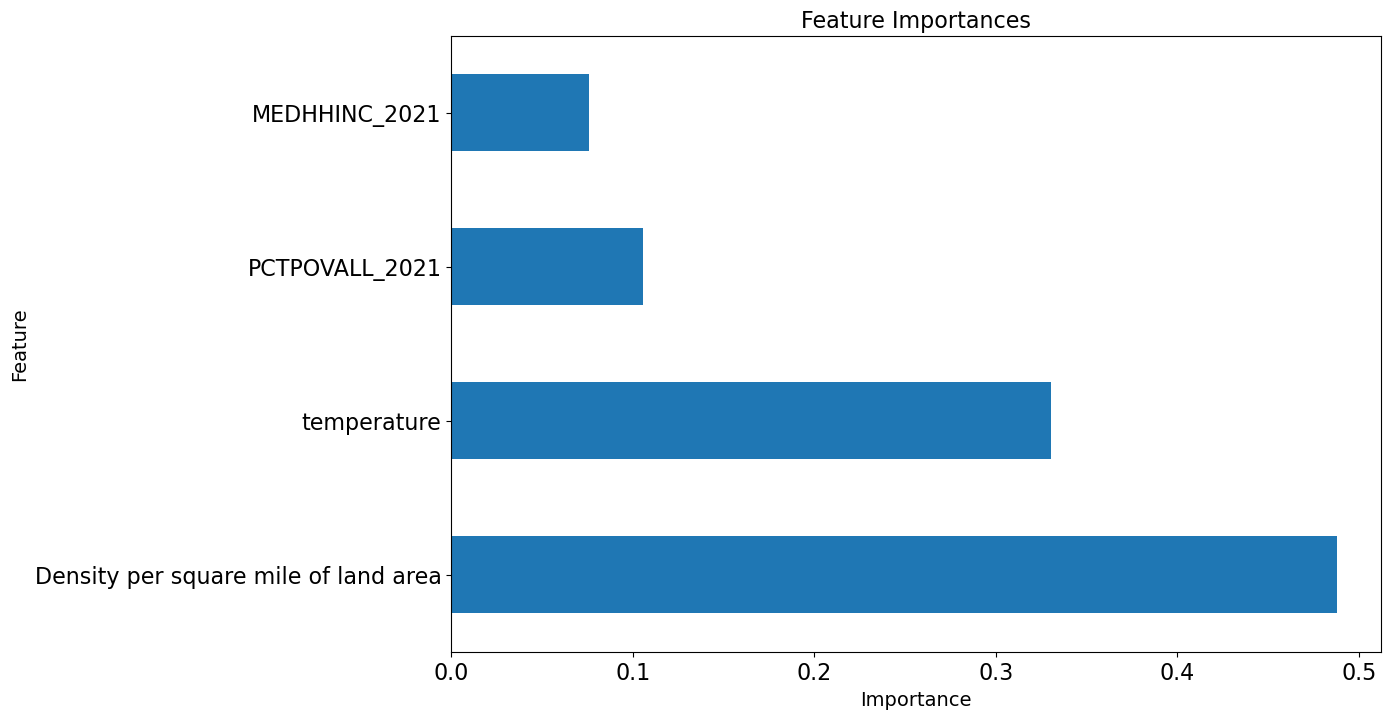

In [213]:
# Get feature importances
importances = best_rf.feature_importances_

# Convert to pandas series for plotting
feature_importances = pd.Series(importances, index=features)

# Sort values to create plot
sorted_importances = feature_importances.sort_values(ascending=False)

#plot feature importances
plt.figure(figsize=(12, 8))  
sorted_importances.plot(kind='barh') 
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Based on the above plot, we notice that population density is the most important factor in determining how many rodent sightings we expect in a certain county, with temperature, poverty and median household income following in that order. It is worth noting that these importances **do not** indicate a positive correlation, rather just the existence of a relationship. Essentially, this plot doesn't suggest that hotter temperatures mean more rodents, despite the importance being positive. 

## 7. Visualization
I wanted to create some visualizations of our data to better understand rodents and rodent prevention in the USA. These plots hopefully can identify some counties doing well/poorly at rodent prevention or reveal some elements of rodent prevention that our data is missing.

### FIPS Codes
I don't have full FIPS codes for these counties, and since we need them for plotting, we will insert them here.

In [214]:
#read in csv
codes = pd.read_csv('./state_and_county_fips_master.csv')

In [215]:
#create new column to facilitate merge onto original dataframe
def create_full_county_name(row):
    
    #isolate name and state
    county_name = str(row['name'])
    state = str(row['state'])
    
    return county_name + ', ' + state

codes['full_county_name'] = codes.apply(create_full_county_name, axis = 1)

In [216]:
#shorten rodents dataframe to only include columns we used
rodents_short = rodent_data[['county_name', 'temperature', 'Density per square mile of land area',
           'PCTPOVALL_2021', 'MEDHHINC_2021', 'rodents_per_unit']]

#merge in FIPS code
rodents_short = pd.merge(rodents_short, codes, left_on = 'county_name',
                         right_on = 'full_county_name', how = 'left').drop(columns = ['name',
                                                                                     'state', 'full_county_name'])

In [217]:
#add leading zeroes to ensure that FIPS code is accurate
def fix_leading_zeroes(row):
    
    #get fips code
    fips_code = str(row['fips'])
    
    #add leading zero if code needs one
    
    if len(fips_code) != 5:
        fips_code = '0' + fips_code

    return fips_code

#apply function to dataframe
rodents_short['fips'] = rodents_short.apply(fix_leading_zeroes, axis = 1)

Now, we can proceed to our mapping step.

In [218]:
import geopandas as gpd

In [219]:
#load County Shape Data
url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_20m.zip"
counties = gpd.read_file(url)

In [220]:
#ensure geo IDs are integers
counties['GEOID'] = counties['GEOID'].astype(int)
rodents_short['fips'] = rodents_short['fips'].astype(int)


#merge data
merged = counties.set_index('GEOID').join(rodents_short.set_index('fips'))

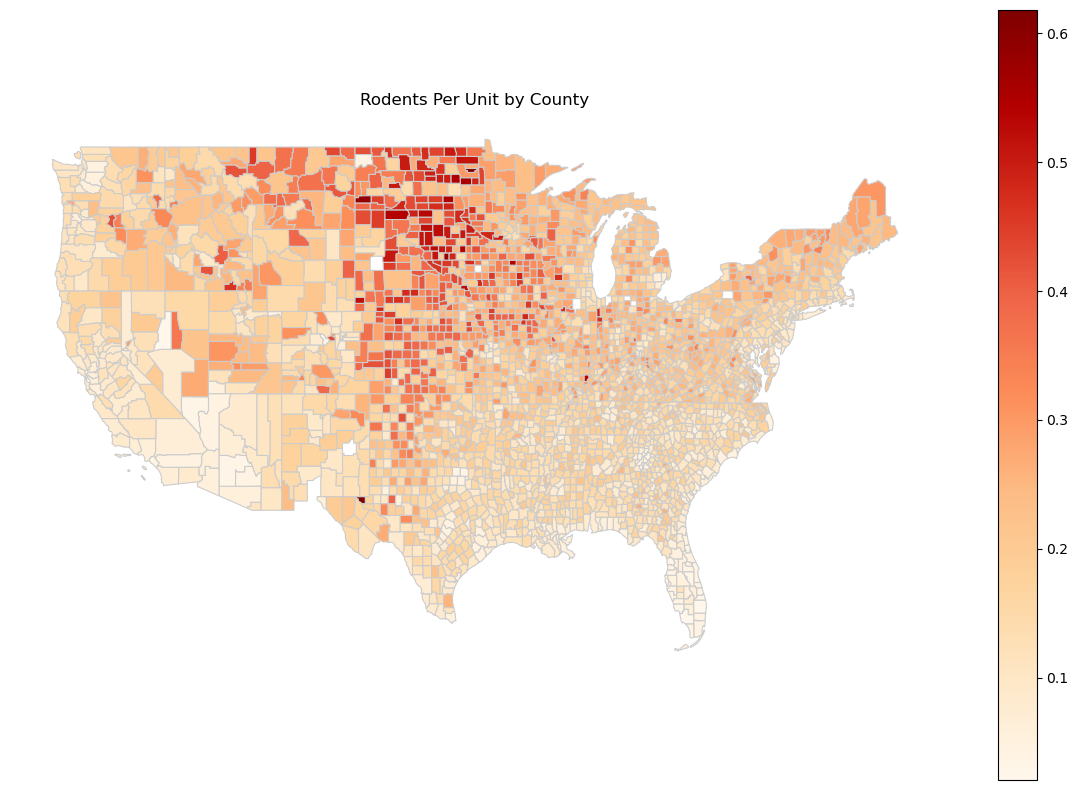

In [221]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='rodents_per_unit', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Rodents Per Unit by County')
ax.set_axis_off()
plt.show()

As we can see above, rodent problems tend to be worse on a per unit basis in the upper midwest. Next, I wanted to use the RandomForest model to plot predicted rodents per unit, and then rodents per unit above expectation.

In [222]:
#make predictions on rodents per unit using trained model
predictions = best_rf.predict(rodents_short[features])

#assign predictions to new column
rodents_short['predicted_rpu'] = predictions

In [223]:
#merge data
merged = counties.set_index('GEOID').join(rodents_short.set_index('fips'))

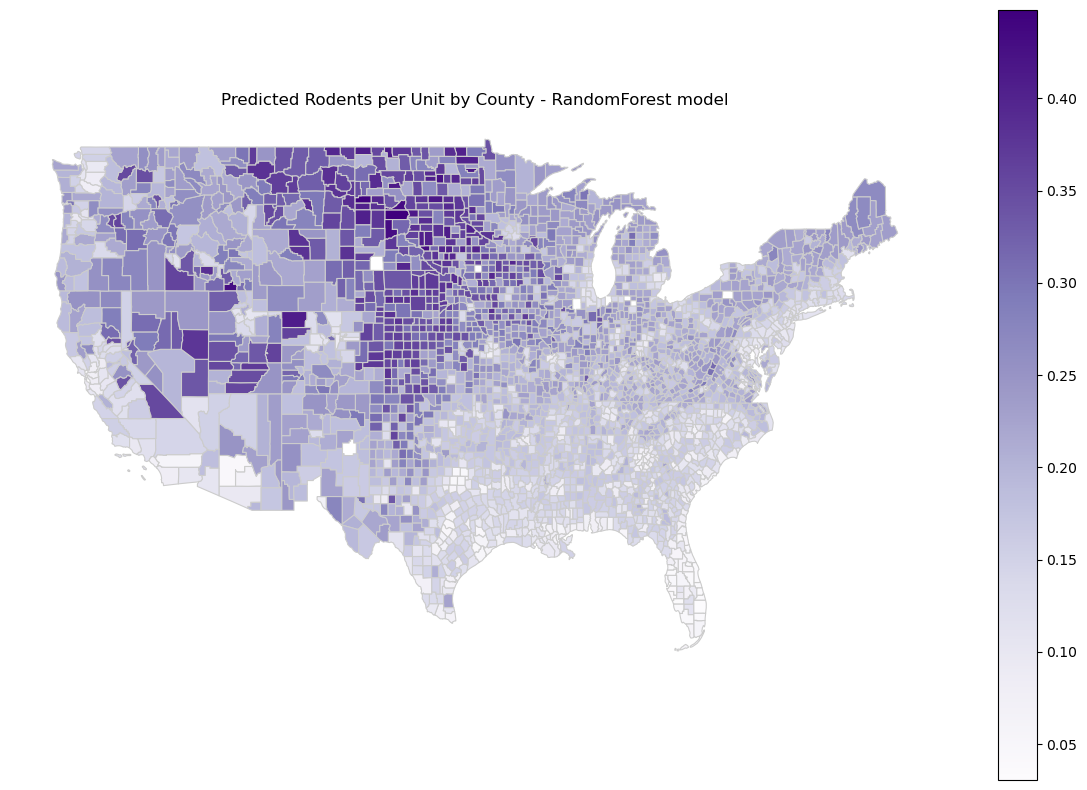

In [224]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='predicted_rpu', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rodents per Unit by County - RandomForest model')
ax.set_axis_off()
plt.show()

The model's predictions seem to make sense. However, the model seems to also predict that some counties out west have more rodents than they actually do. To understand why this is, I wanted to plot rodents per unit above expectation.

In [225]:
#get difference between predicted rodent count and actual rodent count
rodents_short['rpu_above_exp'] = rodents_short['predicted_rpu'] - rodents_short['rodents_per_unit']

#merge data
merged = counties.set_index('GEOID').join(rodents_short.set_index('fips'))

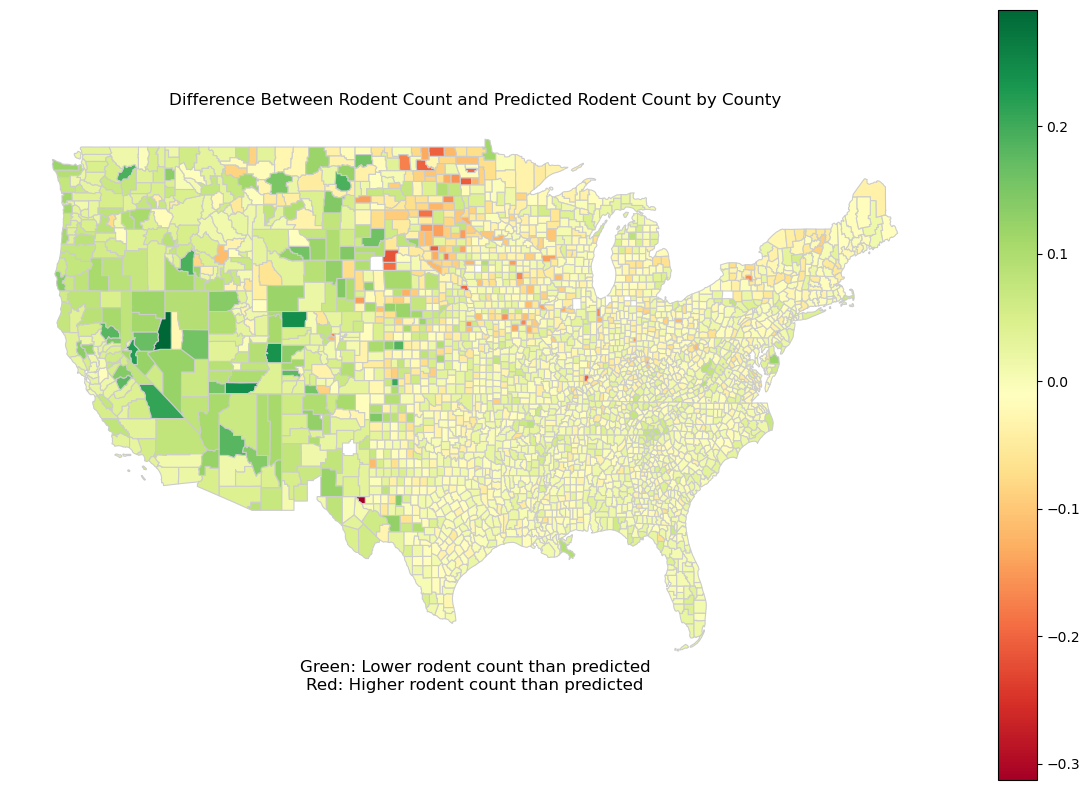

In [226]:
#plot results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='rpu_above_exp', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Difference Between Rodent Count and Predicted Rodent Count by County')
ax.set_axis_off()

note = "Green: Lower rodent count than predicted\nRed: Higher rodent count than predicted"
plt.text(0.5, 0, note, ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.show()

## 8. Conclusions and future analysis

#### What the data shows
Overall, we see in the visualizations that rodent problems seem to be more pronounced in the upper midwest and in urban areas. This makes sense, as we know that cold weather is a good predictor of rodent problems, and the upper midwest is notoriously chilly, especially Minnesota.

#### What our model achieved
Our RandomForest model had an R2 of around 0.54. This value is OK, but it does leave something to be desired. The RandomForest model determine the most important factor to predicting rodent count is population density, followed by temperature

#### What we need to continue
Since our model only was able to explain 54% of variance in rodents per unit, I would love to incoorporate more factors into our RandomForest model. While I'm not sure how good this model can get, we can likely increase it's performance with incoorporations of new factors.

#### Limitations
One key limitation here is that the rodent counts used are based off human observation, and thus prone to some level of variance from the reported numbers. Additionally, the data collected are from different years. While all data is from 2019-2021, there is some uncertainty about the reliability of the data.

#### Acknowledgements
Rodent data from housing survey: US Census - https://www.census.gov/data/experimental-data-products/small-area-rodent-signs.html   
Population density data - https://github.com/camillol/cs424p3/blob/master/data/Population-Density%20By%20County.csv  
Temperature data - https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping